In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


In [4]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import listdir
from os.path import join
from matplotlib import pyplot as plt

In [5]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   horizontal_flip=True,
                                   zoom_range=0.75)
validation_data_gen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_path = 'cats_vs_dogs_dataset/training'
validation_path = 'cats_vs_dogs_dataset/validation'

In [7]:
num_cat_train_im = len(listdir(join(train_path, 'cats')))
num_dog_train_im = len(listdir(join(train_path, 'dogs')))
num_cat_val_im = len(listdir(join(validation_path, 'cats')))
num_dog_val_im = len(listdir(join(validation_path, 'dogs')))
print(num_cat_train_im)
print(num_dog_train_im)
print(num_cat_val_im)
print(num_dog_val_im)

4000
4000
1000
1000


In [8]:
num_train_im = num_cat_train_im + num_dog_train_im
num_val_im = num_cat_val_im + num_dog_val_im

In [9]:
img_height = 64
img_width = 64
num_channels = 3

In [10]:
batch_size = 32
epochs = 25

In [11]:
training_data = train_data_gen.flow_from_directory(train_path,
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

validation_data = validation_data_gen.flow_from_directory(validation_path,
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
examp_images, _ = next(training_data)

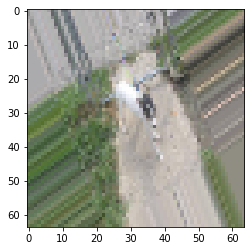

In [13]:
plt.imshow(examp_images[0])

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=3, input_shape=(img_height, img_width, num_channels), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), strides=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [17]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(training_data,
                   steps_per_epoch = int(num_train_im / batch_size),
                   epochs = 25,
                   validation_data = validation_data,
                   validation_steps = int(num_val_im / batch_size))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 62 steps
Epoch 1/25
250/250 [==============================] - 27s 108ms/step - loss: 0.6927 - accuracy: 0.5201 - val_loss: 0.6921 - val_accuracy: 0.5272
Epoch 2/25
250/250 [==============================] - 27s 109ms/step - loss: 0.6861 - accuracy: 0.5556 - val_loss: 0.6755 - val_accuracy: 0.5943
Epoch 3/25
250/250 [==============================] - 28s 111ms/step - loss: 0.6797 - accuracy: 0.5727 - val_loss: 0.6632 - val_accuracy: 0.6190
Epoch 4/25
250/250 [==============================] - 27s 106ms/step - loss: 0.6682 - accuracy: 0.5966 - val_loss: 0.6522 - val_accuracy: 0.6058
Epoch 5/25
250/250 [==============================] - 26s 105ms/step - loss: 0.6589 - accuracy: 0.6062 - val_loss: 0.6518 - val_accuracy: 0.6260
Epoch 6/25
250/250 [==============================] - 26s 105ms/step - loss: 0.6478 - accuracy: 0.6219 - v